# Tutorial de segmentação de região de uma imagem usando python

### Segmentação de Região:
A segmentação de imagem baseada em região é um método de processamento de imagem que agrupa pixels ou regiões semelhantes em uma imagem com base em certas características, como cor, textura, intensidade ou outros atributos relevantes. O objetivo é dividir a imagem em regiões significativas que compartilham propriedades visuais comuns.


Exemplo de Segmentação de região de imagem:

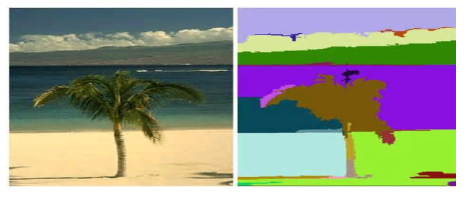


### Métodos de Segmentação:


#### Region Growing:

Este método cresce segmentos recursivamente incluindo pixels vizinhos com características semelhantes. Ele utiliza a diferença nos níveis de cinza para regiões em tons de cinza e a diferença em texturas para imagens texturizadas.

Exemplo de Region Growing:


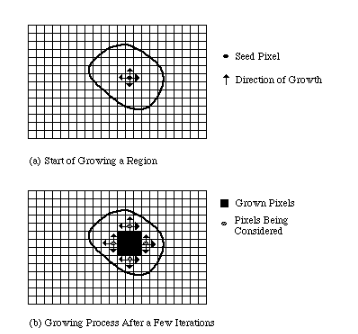

#### Region Splitting:
Neste método, a imagem inteira é considerada como uma única região. Agora, para dividir a região em segmentos, verifica-se os pixels incluídos na região inicial para ver se seguem o conjunto pré-definido de critérios. Se seguirem regras semelhantes, eles são agrupados em um único segmento.


Exemplo de Region Splitting:


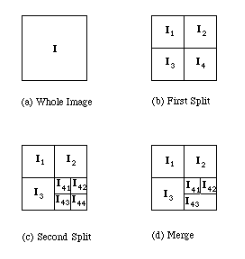

### Tutorial em python:


#### 1.  Primeiro, importe as bibliotecas necessárias:

In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


#### 2.	Em seguida, defina a função de crescimento de regiões:

In [38]:
def region_growing(image, seed):
    height, width = image.shape
    mask = np.zeros_like(image, dtype=np.uint8)
    similarity_criteria = 30
    pixels_to_check = [seed]

    while pixels_to_check:
        current_pixel = pixels_to_check.pop(0)

        if mask[current_pixel[1], current_pixel[0]] == 0:
            mask[current_pixel[1], current_pixel[0]] = 255

            for i in range(-1, 2):
                for j in range(-1, 2):
                    x, y = current_pixel[0] + i, current_pixel[1] + j

                    if 0 <= x < width and 0 <= y < height:
                        intensity_difference = abs(int(image[y, x]) - int(image[current_pixel[1], current_pixel[0]]))

                        if intensity_difference < similarity_criteria:
                            pixels_to_check.append((x, y))

    return mask


#### 3.	Carregue a imagem que você deseja segmentar:

In [39]:
# Carrega a imagem
image_path = 'kodim23.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

#### 4.	Defina a semente para o algoritmo de crescimento de regiões. Neste exemplo, usamos o pixel no canto superior esquerdo da imagem como semente:

In [40]:
# Escolhe um ponto de semente (seed) para iniciar o crescimento da região
seed_point = (100, 100)

#### 5.	Realize a segmentação por região:

In [41]:
# Aplica o algoritmo de crescimento de região
segmentation_result = region_growing(image, seed_point)

#### 6.	Finalmente, exiba a imagem segmentada usando matplotlib:

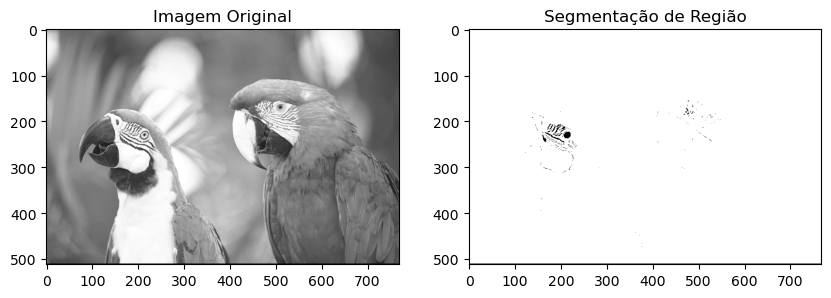

In [42]:
# Exibe a imagem original e a máscara resultante no notebook
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Imagem Original')

plt.subplot(1, 2, 2)
plt.imshow(segmentation_result, cmap='gray')
plt.title('Segmentação de Região')

plt.show()

#### Código completo: 

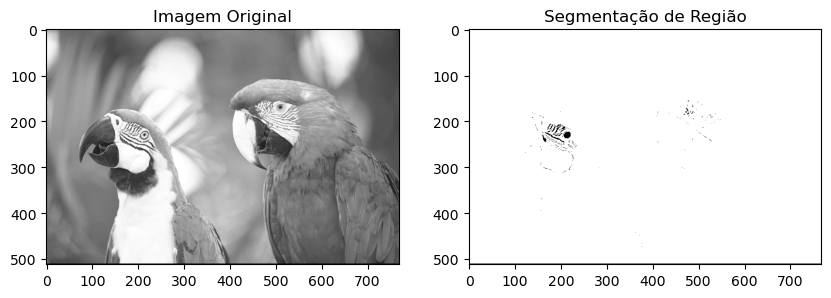

In [36]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def region_growing(image, seed):
    height, width = image.shape
    mask = np.zeros_like(image, dtype=np.uint8)
    similarity_criteria = 30
    pixels_to_check = [seed]

    while pixels_to_check:
        current_pixel = pixels_to_check.pop(0)

        if mask[current_pixel[1], current_pixel[0]] == 0:
            mask[current_pixel[1], current_pixel[0]] = 255

            for i in range(-1, 2):
                for j in range(-1, 2):
                    x, y = current_pixel[0] + i, current_pixel[1] + j

                    if 0 <= x < width and 0 <= y < height:
                        intensity_difference = abs(int(image[y, x]) - int(image[current_pixel[1], current_pixel[0]]))

                        if intensity_difference < similarity_criteria:
                            pixels_to_check.append((x, y))

    return mask

# Carrega a imagem
image_path = 'kodim23.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Escolhe um ponto de semente (seed) para iniciar o crescimento da região
seed_point = (100, 100)

# Aplica o algoritmo de crescimento de região
segmentation_result = region_growing(image, seed_point)

# Exibe a imagem original e a máscara resultante no notebook
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Imagem Original')

plt.subplot(1, 2, 2)
plt.imshow(segmentation_result, cmap='gray')
plt.title('Segmentação de Região')

plt.show()

### Referências:
https://datagen.tech/guides/image-annotation/image-segmentation/#

https://www.tutorialspoint.com/region-and-edge-based-segmentation

●	OpenCV: OpenCV-Python Tutorials

●	Matplotlib: Visualization with Python

●	Region Growing - Wikipedia

●	Component-wise operations - Wikipedia

